In [661]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import timedelta

## Part 1: Explore the dataset to get familiar with it

for this study, it will focus on ticket_items_manipulated sheet from the given excel file

in this section, it will focus on the preprocessing part of the data before going into the analysis

In [662]:
# Importing data from provided excel spreadsheet

# for the Ticket Items Manipulated Sheet
rawdata1 = pd.read_csv('rawdata.csv')


In [663]:
# glimpse of data1
rawdata1.head()

,id,state,priority,created_at,updated_at,started_at,started_move,finished_move,started_dispense,finished_dispense,...,ingredient_id,ticket_id,mass,actual_mass,item_cost,location,ticket_id_counts,move_no_in_sequence,priority_list,ingredient_list
0,3886f472-4770-4c8b-970e-922a236472a0,TICKETITEM_DONE,20,2021-09-27 09:22:55.629269,2021-09-27 11:02:27.862552,2021-09-27 10:58:00.084215+00:00,2021-09-27 10:58:00.084215,2021-09-27 10:58:12.291976,2021-09-27 10:58:12.291976,2021-09-27 10:58:55.826401,...,8bf1771c-a330-4410-a890-b7b7c7b621b3,d72665d4-7c9b-4747-94bd-a55583fc509e,110000,117273,0.0,NaN,7,0,"20, 40, 100, 120, 130, 140, 150",NaN
1,052d6eb4-faf4-440e-b703-6a98bf6f99f1,TICKETITEM_DONE,40,2021-09-27 09:22:55.634039,2021-09-27 11:02:27.863363,2021-09-27 10:58:57.131940+00:00,2021-09-27 10:58:57.131940,2021-09-27 10:59:08.717437,2021-09-27 10:59:08.717438,2021-09-27 10:59:39.916711,...,85e5083f-1736-4922-9bf7-1cf7da802d64,d72665d4-7c9b-4747-94bd-a55583fc509e,84000,84035,0.0,NaN,7,1,"20, 40, 100, 120, 130, 140, 150",NaN
2,089e162f-f4ee-4903-9c95-c8299c74db05,TICKETITEM_DONE,100,2021-09-27 09:22:55.635819,2021-09-27 11:02:27.864089,2021-09-27 10:59:42.844839+00:00,2021-09-27 10:59:42.844839,2021-09-27 10:59:52.747807,2021-09-27 10:59:52.747807,2021-09-27 11:00:01.407931,...,87941a51-fd64-4171-95b9-db76bd4465f0,d72665d4-7c9b-4747-94bd-a55583fc509e,40000,40889,0.0,NaN,7,2,"20, 40, 100, 120, 130, 140, 150",NaN
3,9e0cd9e2-d006-4104-9b6a-647da3f3f9a7,TICKETITEM_DONE,120,2021-09-27 09:22:55.637931,2021-09-27 11:02:27.864890,2021-09-27 11:00:10.028055+00:00,2021-09-27 11:00:10.028056,2021-09-27 11:00:19.765198,2021-09-27 11:00:19.765198,2021-09-27 11:00:28.571693,...,4c02a8a1-7b6d-43ef-b639-03f0b7b7a4b1,d72665d4-7c9b-4747-94bd-a55583fc509e,18000,21887,0.0,NaN,7,3,"20, 40, 100, 120, 130, 140, 150",NaN
4,66678299-55cf-4982-a0ea-61613795358b,TICKETITEM_DONE,130,2021-09-27 09:22:55.639783,2021-09-27 11:02:27.865631,2021-09-27 11:00:29.726715+00:00,2021-09-27 11:00:29.726715,2021-09-27 11:00:37.766834,2021-09-27 11:00:37.766834,2021-09-27 11:00:44.556128,...,e1d855b2-f0b5-45d8-a1f8-a10ba21eed20,d72665d4-7c9b-4747-94bd-a55583fc509e,2000,2583,0.0,NaN,7,4,"20, 40, 100, 120, 130, 140, 150",NaN


In [664]:
rawdata1.shape

(1462, 22)

# Data Cleaning


## Ticket Items Manipulated Sheet

1. removing 1 dimensional column
2. reformat DateTime 
3. Checking for missing/duplicate data


In [665]:
# checking 1 dimensional data
rawdata1.nunique()

id                     1236
state                     1
priority                 14
created_at             1236
updated_at             1236
started_at             1236
started_move           1236
finished_move          1236
started_dispense       1236
finished_dispense      1236
collected_at              1
ticket_item_failed        1
ingredient_id            17
ticket_id               196
mass                     25
actual_mass            1228
item_cost                 1
location                  0
ticket_id_counts          9
move_no_in_sequence      10
priority_list           110
ingredient_list           0
dtype: int64

the number of unique id is not equal to the total row observation, this can imply that there are missing/duplicate values
also notice that some column has 0 and 1 value, this imply that the column is 1 dimension. on normal practice, these columns are remove from the data as it dont provide any information

In [666]:
# changing the above to dataframe for indexing
remove_cols = pd.DataFrame(rawdata1.nunique())

In [667]:
# getting the required column name that needed to be removed by indexing the dataframe
remove_cols = remove_cols[remove_cols.iloc[:,0] <= 1].index.tolist()

In [668]:
# return all column to list
cols = rawdata1.columns.tolist()
# looping all the column removing column that has single values
cols = [column for column in cols if column not in remove_cols]

In [669]:
# masking back to dataframe
rawdata1 = rawdata1.loc[:, cols]

In [670]:
#return datatime columns 
datetime_col = rawdata1.iloc[:,[2,3,4,5,6,7,8]].columns.tolist()

In [671]:
# Reformating the datetime column from string to DateTime Format
for col in datetime_col:

    # string indexing to cut off the decimals (assuming mili second is non-relevant)
    rawdata1.loc[:,col] = rawdata1.loc[:,col].str[0:19]
    # reformating datetime
    rawdata1.loc[:,col] = pd.to_datetime(rawdata1.loc[:,col],format="%Y-%m-%d %H:%M:%S")

In [672]:
#checking unique values for the columns
rawdata1.nunique()

id                     1236
priority                 14
created_at              197
updated_at              196
started_at             1236
started_move           1236
finished_move          1236
started_dispense       1236
finished_dispense      1223
ingredient_id            17
ticket_id               196
mass                     25
actual_mass            1228
ticket_id_counts          9
move_no_in_sequence      10
priority_list           110
dtype: int64

In [673]:
# Checking missing values
rawdata1.isna().sum()

id                     0
priority               0
created_at             0
updated_at             0
started_at             0
started_move           0
finished_move          0
started_dispense       0
finished_dispense      0
ingredient_id          0
ticket_id              0
mass                   0
actual_mass            0
ticket_id_counts       0
move_no_in_sequence    0
priority_list          0
dtype: int64

In [674]:
# see duplicated rows
rawdata1[rawdata1.duplicated()]

,id,priority,created_at,updated_at,started_at,started_move,finished_move,started_dispense,finished_dispense,ingredient_id,ticket_id,mass,actual_mass,ticket_id_counts,move_no_in_sequence,priority_list
1009,5d3a54bd-558f-42ee-ab15-3da6bb1071c4,10,2021-09-20 08:56:29,2021-09-20 11:06:18,2021-09-20 11:02:01,2021-09-20 11:02:01,2021-09-20 11:02:11,2021-09-20 11:02:11,2021-09-20 11:02:33,dd565e5e-13a7-4379-9fc8-b9221fae01cf,1c2462b6-44f6-47c1-9884-d53146b22f82,120000,128678,6,0,"10, 50, 100, 120, 140, 150"
1010,a5572cdc-f8e8-45f6-ad1b-8c172f321834,50,2021-09-20 08:56:29,2021-09-20 11:06:18,2021-09-20 11:02:37,2021-09-20 11:02:37,2021-09-20 11:02:46,2021-09-20 11:02:46,2021-09-20 11:03:14,ad97a5b1-2c4a-464a-8942-cecfddca6225,1c2462b6-44f6-47c1-9884-d53146b22f82,70000,74784,6,1,"10, 50, 100, 120, 140, 150"
1011,3fa94422-a031-4e11-b435-ecfa3d96d083,100,2021-09-20 08:56:29,2021-09-20 11:06:18,2021-09-20 11:03:15,2021-09-20 11:03:15,2021-09-20 11:03:24,2021-09-20 11:03:24,2021-09-20 11:03:34,87941a51-fd64-4171-95b9-db76bd4465f0,1c2462b6-44f6-47c1-9884-d53146b22f82,40000,48523,6,2,"10, 50, 100, 120, 140, 150"
1012,431be321-9d8b-4486-9466-ab199c9b8f0a,120,2021-09-20 08:56:29,2021-09-20 11:06:18,2021-09-20 11:03:36,2021-09-20 11:03:36,2021-09-20 11:03:46,2021-09-20 11:03:46,2021-09-20 11:03:58,4c02a8a1-7b6d-43ef-b639-03f0b7b7a4b1,1c2462b6-44f6-47c1-9884-d53146b22f82,15000,19579,6,3,"10, 50, 100, 120, 140, 150"
1013,bd99d7bd-c8de-4ee2-9e34-9c15a8852d79,140,2021-09-20 08:56:29,2021-09-20 11:06:18,2021-09-20 11:04:02,2021-09-20 11:04:02,2021-09-20 11:04:10,2021-09-20 11:04:10,2021-09-20 11:04:25,5345f17d-a10d-4bec-ae3c-f6cffcc539be,1c2462b6-44f6-47c1-9884-d53146b22f82,50000,54769,6,4,"10, 50, 100, 120, 140, 150"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,87737841-290f-473c-9087-ff6f35f134c3,100,2021-09-20 12:32:45,2021-09-20 12:38:57,2021-09-20 12:36:28,2021-09-20 12:36:28,2021-09-20 12:36:37,2021-09-20 12:36:37,2021-09-20 12:36:47,87941a51-fd64-4171-95b9-db76bd4465f0,2c200b77-17fe-4261-99e5-ec5b1fb9d0c6,40000,43625,7,2,"10, 40, 100, 120, 130, 140, 150"
1231,56a350b1-bdac-46ba-8c39-a13bc08956a8,120,2021-09-20 12:32:45,2021-09-20 12:38:57,2021-09-20 12:36:47,2021-09-20 12:36:47,2021-09-20 12:36:57,2021-09-20 12:36:57,2021-09-20 12:37:07,4c02a8a1-7b6d-43ef-b639-03f0b7b7a4b1,2c200b77-17fe-4261-99e5-ec5b1fb9d0c6,15000,16808,7,3,"10, 40, 100, 120, 130, 140, 150"
1232,6cb985e1-7ea5-4b81-9133-a0a73ad0e52c,130,2021-09-20 12:32:45,2021-09-20 12:38:57,2021-09-20 12:37:07,2021-09-20 12:37:07,2021-09-20 12:37:15,2021-09-20 12:37:15,2021-09-20 12:37:28,e1d855b2-f0b5-45d8-a1f8-a10ba21eed20,2c200b77-17fe-4261-99e5-ec5b1fb9d0c6,2000,1624,7,4,"10, 40, 100, 120, 130, 140, 150"
1233,7ad4f7dc-4ae4-46a8-b856-3edc44a0f3a1,140,2021-09-20 12:32:45,2021-09-20 12:38:57,2021-09-20 12:37:28,2021-09-20 12:37:28,2021-09-20 12:37:36,2021-09-20 12:37:36,2021-09-20 12:38:02,d540dc34-5e97-4032-9c6b-ec8e0bf63864,2c200b77-17fe-4261-99e5-ec5b1fb9d0c6,50000,52263,7,5,"10, 40, 100, 120, 130, 140, 150"


In [675]:
# Dropping Duplicates keep the first 
rawdata1 = rawdata1.drop_duplicates()

## Part 2: Describe the dataset / summarise your initial findings  

Initial Overview of Dataset 1 (Tickets Item Manipulated)

- data consist of 1,462 observations and 22 columns
- Six columns have either singular or missing data values
- 226 observations are duplicate values of all the columns
- 0 missing values apart from the stated column

Taking a few key assumptions
Due to the presence of DateTime, the data can be classified as time-series data.
226 duplicate observations were taken off and treated as recording errors due to duplicates in time-series data being non-relevant.
Columns which has singular value / NaN have 0 variance. Normally these columns are taken out as it doesn't provide any information

After cleaning the data using the above assumptions, the initial findings are as follows:

1. ID - The primary key of the dataset. The total count of unique id is equivalent to the sum of rows of the cleaned datasets. Every action on the dispenser is defined uniquely by ID
2. Priority - A subset of the priority list. Showed which part of the priority list are currently processed by the dispenser
3. 7 DateTime columns = the DateTime information for which the ingredients are being processed. 
4. ingredient_id = ingredient information 
5. mass = total amount of the ingredient the robot required to dispense
6. actual_mass = the actual amount the robot dispensed
7. ticket_id_count = total number of ingredient (total number in priority list)
8. move_no_in_seq = the order of ingredient the robot is currently executing
9. priority_list = the combination of ingredient for a meal



## Part 3: Extract some basic stats about the meals (tickets) made. 

### Exploratory Data Analysis

### How many meals were made per day?

as the data provides record for ingredients, we need an assumption to summarise each time the number of meal is produced

The rule used <br>
meal produced is counted everytime the row whereby :

priority = last element of priority list

In [676]:
# to print last element of priority list
rawdata1['last_list'] = rawdata1.priority_list.map(lambda x:x.split(', ')[-1]).astype('int64')

In [677]:
# masking the data using above rule, resample to D and use count to arrive at total meals per day
x = rawdata1[rawdata1.priority == rawdata1.last_list].set_index('started_at').resample('D').count().iloc[:,-1]

In [678]:
# changing to dataframe, tidying up the table
x = pd.DataFrame(x)

x = x.rename(columns={"last_list": "Total Meal"})
x.index = x.index.rename('Date')

Total Meal per Day is tabulate as follows

In [679]:
x

,Total Meal
Date,
2021-09-20,35
2021-09-21,34
2021-09-22,35
2021-09-23,30
2021-09-24,16
2021-09-25,0
2021-09-26,0
2021-09-27,40


<AxesSubplot:title={'center':'Total Meal Produce per Day'}, xlabel='Date'>

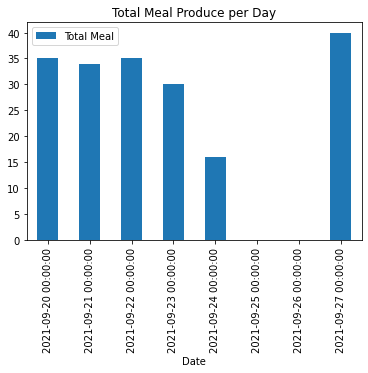

In [680]:
x.plot.bar(title = 'Total Meal Produce per Day')

### How many overall?


total of 190 meals are produce during 6 days

In [338]:
x.sum()

Total Meal    190
dtype: int64

### What was the most popular ingredient?

The ingredient can be represented by the ingredient ID
hence the groupby method with sum formula can be used

The result is shown as per below

In [545]:
x2 = rawdata1.groupby('ingredient_id').sum('actual_mass').iloc[:,1].sort_values(ascending = False)
x2 = pd.DataFrame(x2)


In [548]:
x2.rename(columns = {'mass' : 'Total_mass'}, inplace = True)

In [549]:
x2

,Total_mass
ingredient_id,
dd565e5e-13a7-4379-9fc8-b9221fae01cf,22368000
ad97a5b1-2c4a-464a-8942-cecfddca6225,6888000
87941a51-fd64-4171-95b9-db76bd4465f0,6880000
f1f0a3a7-0f9f-4912-81bd-8e2b97f54b52,6160000
85e5083f-1736-4922-9bf7-1cf7da802d64,5376000
2d7f72ae-7a99-4538-b178-eb280b16ec25,5200000
173635e7-80be-452c-966b-8bccaa7cd016,2580000
d540dc34-5e97-4032-9c6b-ec8e0bf63864,2360000
e31c5ea0-00ba-4fb3-9bd6-185237ca1ceb,1990000


<AxesSubplot:ylabel='ingredient_id'>

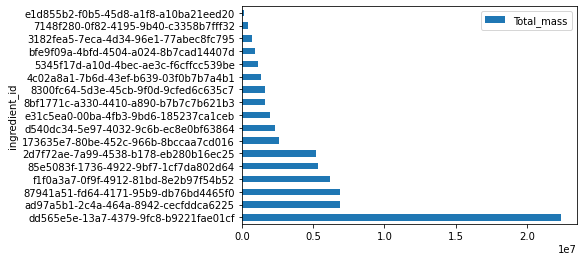

In [550]:
x2.plot.barh()

### What was the most popular meal combination?

The meal combination can be described using the groupby method on the priority list. however, this will produce a biased result as meals with more ingredients will give more counts

to address this, the formula is 
1. groupby priority list
2. use count as function
3. divide total count with tickets id count which is total number of ingredient

this will return the frequency of meal produced

In [681]:
# Return popular meal combination by using count
x4 = rawdata1.groupby('priority_list').count().iloc[:,0]
x4 = pd.DataFrame(x4).reset_index()

In [682]:
# create another column to return priority list as list
x4['priority_list2'] = x4.priority_list.map(lambda x:x.split(', '))

In [683]:
# return the number of ingredient for each meal combination
x4['len'] = x4.priority_list2.map(len)
x4['total'] = x4['id']/x4['len']

In [684]:
# tidying up the dataframe
x4 = x4.set_index('priority_list')
x4 = x4.iloc[:,3]
x4 = pd.DataFrame(x4)


### Results for most popular meal combination

In [685]:
x4.sort_values('total', ascending = False)

,total
priority_list,
"10, 40, 90, 100, 130, 140, 150",13.857143
"10, 50, 100, 120, 140, 150",12.833333
"10, 50, 60, 90, 100, 110, 150",10.571429
"10, 40, 100, 120, 130, 140",9.833333
"10, 40, 100, 120, 130, 140, 150",8.000000
...,...
"10, 50, 100, 110, 120, 140",0.833333
"10, 50, 70, 120, 150",0.800000
"10, 40, 60, 90, 150",0.800000


### How long did each meal take to make on average?

the time taken for each meal is calculated by taking started_at column on the first row and finished_dispensed last row for each unique value in ticket_id

In [688]:
# return list of meal
meals = rawdata1.ticket_id.unique()

In [700]:
# filtering the dataset using each unique ticket_id, taking each datapoints mentioned using above method
start = []
end = []
num_ing = []

for meal in tqdm(meals):    
    meal_df = rawdata1.loc[rawdata1.ticket_id == meal]

    
    temp_start = meal_df.iloc[0,4]
    
    temp_end = meal_df.iloc[-1,8]
    
    temp_len = len(meal_df)
  

    start.append(temp_start)
    end.append(temp_end)
    num_ing.append(temp_len)


100%|██████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 2062.70it/s]


In [701]:
meals_df = pd.DataFrame({
    'meal' : meals,
    'start_time' : start,
    'end_time' : end,
    'number_ingred' : num_ing
})

In [702]:
meals_df['prep_time'] = meals_df['end_time'] - meals_df['start_time']

### Average time taken for each meal to be prepared is around 4 mins and 35 seconds

In [703]:
meals_df.prep_time.mean()

Timedelta('0 days 00:04:35.505102040')

### Detail for time taken for each meal is presented in the table below

In [704]:
meals_df

,meal,start_time,end_time,number_ingred,prep_time
0,d72665d4-7c9b-4747-94bd-a55583fc509e,2021-09-27 10:58:00,2021-09-27 11:02:02,7,0 days 00:04:02
1,02e12cd3-b8bb-48c6-bc41-0f1f81bea9ee,2021-09-27 11:00:19,2021-09-27 11:03:52,7,0 days 00:03:33
2,9f554000-8407-4564-8085-27f66c0ec7d7,2021-09-27 11:02:13,2021-09-27 11:08:18,9,0 days 00:06:05
3,3d08d039-c5c9-4c44-8fe7-cbd2fb2f6175,2021-09-27 12:12:07,2021-09-27 12:21:30,7,0 days 00:09:23
4,516fabb8-2a40-41b8-8bc3-12dd39c1f789,2021-09-27 11:18:41,2021-09-27 11:24:31,8,0 days 00:05:50
...,...,...,...,...,...
191,8fd81df3-42b2-40b8-8504-54dda63bfee7,2021-09-22 12:21:15,2021-09-22 12:24:20,6,0 days 00:03:05
192,d6e8ba30-d461-4515-b22f-f29ff98b7d83,2021-09-22 12:41:01,2021-09-22 12:48:14,7,0 days 00:07:13
193,c3d30424-4c6a-4c57-b681-1e948a38b684,2021-09-22 12:24:05,2021-09-22 12:28:39,9,0 days 00:04:34
194,30b2c09c-7bff-4930-90b4-5297b81155dc,2021-09-22 12:38:25,2021-09-22 12:45:33,7,0 days 00:07:08


### Is there any relationship between ingredient and meal prep time ?



In [705]:
#converting prep time to seconds
meals_df['prep_time_sec'] = meals_df.prep_time.dt.total_seconds()


In [706]:
meals_df = meals_df.set_index('meal')

theres weak to moderate positive correlation between number of ingredients and preparation time

In [707]:
meals_df.loc[:,['number_ingred','prep_time_sec']].corr()

,number_ingred,prep_time_sec
number_ingred,1.000000,0.389385
prep_time_sec,0.389385,1.000000


### What about meal popularity and prep time? 
 first we need an information about meal popularity
 this can be calculated using groupby with count method on ticket id then divided by total number of ingredient

In [709]:
# getting the meal popularity by finding how many of the meals are produced
x6 = rawdata1.groupby('ticket_id').count().iloc[:,0]
x6= pd.DataFrame(x6)
x6.reset_index(inplace = True)
x6 = x6.rename(columns = {'ticket_id' : 'meal', 'id':'total_count'})

In [710]:
# setting index to ticket_id = meal
x6 = x6.set_index('meal')

In [711]:
# joining meal with the previous meals_df dataframe
meals_df = meals_df.join(x6)

In [712]:
# total meal produce is a function of meal counts divided by total ingredient
meals_df['total_meal_produce'] = meals_df['total_count'] / meals_df['number_ingred']

In [713]:
# no correlation can be calculated as all type of meal only been produce once in this dataframe
meals_df.loc[:,['total_meal_produce','prep_time_sec']].corr()

,total_meal_produce,prep_time_sec
total_meal_produce,NaN,NaN
prep_time_sec,NaN,1.0


by using the assumption that ticket_id is equivalent to the meal, the data showed that all the meal has been produced only once. <br>
hence no correlation can be calculated

In [714]:
meals_df

,start_time,end_time,number_ingred,prep_time,prep_time_sec,total_count,total_meal_produce
meal,,,,,,,
d72665d4-7c9b-4747-94bd-a55583fc509e,2021-09-27 10:58:00,2021-09-27 11:02:02,7,0 days 00:04:02,242.0,7,1.0
02e12cd3-b8bb-48c6-bc41-0f1f81bea9ee,2021-09-27 11:00:19,2021-09-27 11:03:52,7,0 days 00:03:33,213.0,7,1.0
9f554000-8407-4564-8085-27f66c0ec7d7,2021-09-27 11:02:13,2021-09-27 11:08:18,9,0 days 00:06:05,365.0,9,1.0
3d08d039-c5c9-4c44-8fe7-cbd2fb2f6175,2021-09-27 12:12:07,2021-09-27 12:21:30,7,0 days 00:09:23,563.0,7,1.0
516fabb8-2a40-41b8-8bc3-12dd39c1f789,2021-09-27 11:18:41,2021-09-27 11:24:31,8,0 days 00:05:50,350.0,8,1.0
...,...,...,...,...,...,...,...
8fd81df3-42b2-40b8-8504-54dda63bfee7,2021-09-22 12:21:15,2021-09-22 12:24:20,6,0 days 00:03:05,185.0,6,1.0
d6e8ba30-d461-4515-b22f-f29ff98b7d83,2021-09-22 12:41:01,2021-09-22 12:48:14,7,0 days 00:07:13,433.0,7,1.0
c3d30424-4c6a-4c57-b681-1e948a38b684,2021-09-22 12:24:05,2021-09-22 12:28:39,9,0 days 00:04:34,274.0,9,1.0


## Part 4:  Is there anything else that can be extracted from this dataset that could shed some light on how the robot / parts of the robot are performing?  Visualisations and metrics are welcome. 

the performance of the robot can be evaluated by calculated the success rate for each meal produce <br>
for example if a meal requires 6 ingredients, a success rate is measured if all 6 ingredients are dispensed successfully <br>
however, if one of the ingredients failed, it will be counted as fail result

using the same loop

In [715]:
# return list of meal
meals = rawdata1.ticket_id.unique()


In [716]:
# filtering the dataset using each unique ticket_id, taking each datapoints mentioned using above method
total_ing = []
num_ing = []

for meal in tqdm(meals):    
    meal_df = rawdata1.loc[rawdata1.ticket_id == meal]
       
    temp_len = len(meal_df)
    temp_total = meal_df.iloc[0,13]
  

    total_ing.append(temp_total)
    num_ing.append(temp_len)


100%|██████████████████████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 2305.37it/s]


In [719]:
meals_df = pd.DataFrame({
    'meal' : meals,
    'number_ingred_dispensed' : num_ing,
    'Total_ingred_reg' : total_ing

})

In [720]:
meals_df.loc[meals_df.number_ingred_dispensed == meals_df.Total_ingred_reg, 'Success / Failed'] = 'Success'
meals_df.loc[meals_df.number_ingred_dispensed != meals_df.Total_ingred_reg, 'Success / Failed'] = 'Failed'


In [721]:
x8 = pd.DataFrame(meals_df['Success / Failed'].value_counts())

In [722]:
x8

,Success / Failed
Success,175
Failed,21


<AxesSubplot:title={'center':'Robot Performance on Making Meals'}>

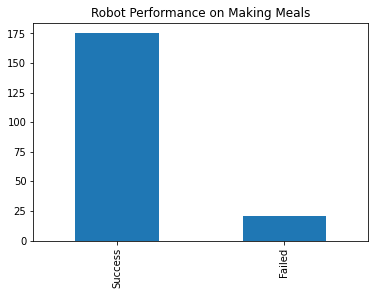

In [724]:
meals_df['Success / Failed'].value_counts().plot.bar(title = 'Robot Performance on Making Meals')

Based on the 196 meals, 175 managed to dispense all the ingredients required. However, 21 of the meals failed to dispense at least one of the ingredients. <br>
the success rate of the robot is the total success / total meals = 89% performance